Customer Segmentation Analysis 

1. Installing and adding data 
Sources :- kaggle 

In [4]:
! pip install pandas numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Retail_Transactions_Dataset.csv')


In [6]:
print(df.head())

   Transaction_ID                 Date      Customer_Name  \
0      1000000000  2022-01-21 06:27:29       Stacey Price   
1      1000000001  2023-03-01 13:01:21   Michelle Carlson   
2      1000000002  2024-03-21 15:37:04        Lisa Graves   
3      1000000003  2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004  2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   Payment_Method           City        Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles    Warehouse Club              True   
1 

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 92.5+ MB
None


In [25]:
print(df.isnull().sum())

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64


In [23]:
df_cleaned = df.dropna()

In [10]:
# Drop duplicate rows if they exist
df_cleaned = df_cleaned.drop_duplicates()


EDA 

In [15]:
print(df_cleaned.describe())

       Transaction_ID    Total_Items     Total_Cost
count    6.660570e+05  666057.000000  666057.000000
mean     1.000500e+09       5.497803      52.399692
std      2.888990e+05       2.871845      27.434712
min      1.000000e+09       1.000000       5.000000
25%      1.000250e+09       3.000000      28.630000
50%      1.000500e+09       5.000000      52.310000
75%      1.000751e+09       8.000000      76.150000
max      1.001000e+09      10.000000     100.000000


plotting distribution of cost

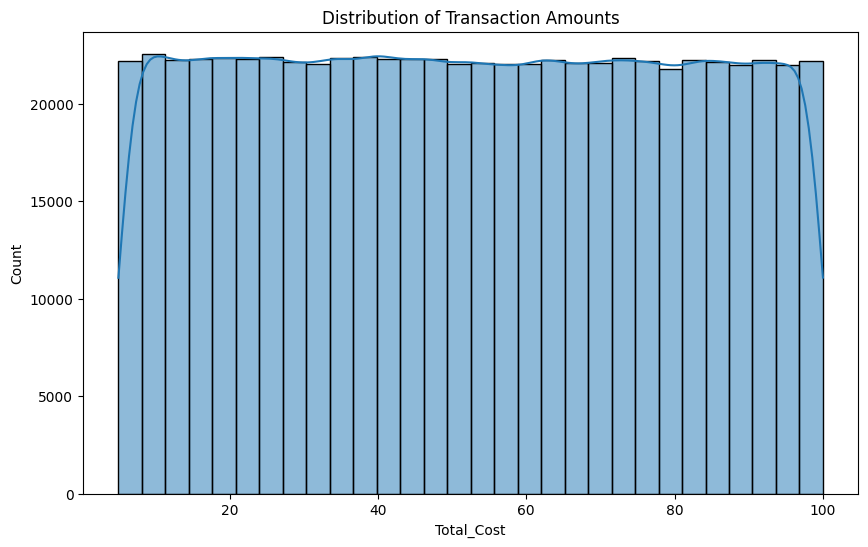

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt




plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Total_Cost'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

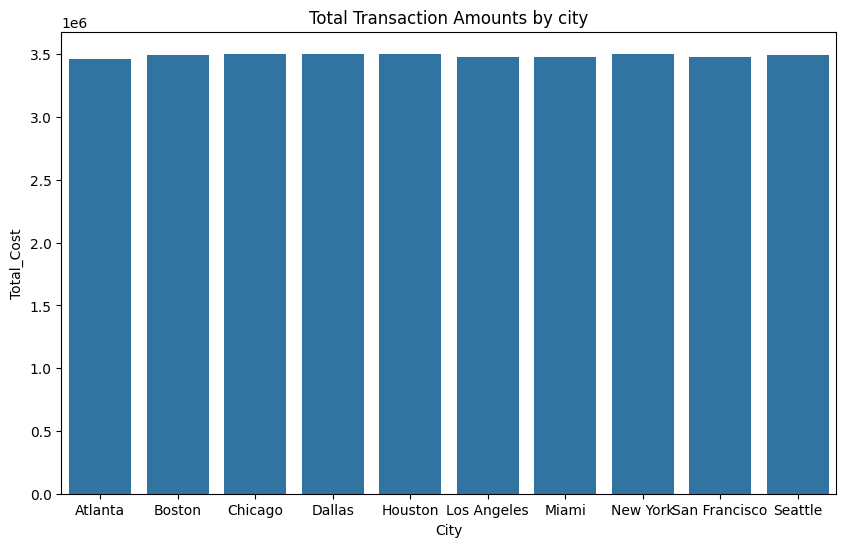

In [31]:
# Distribution of Transaction Amounts
import seaborn as sns
import matplotlib.pyplot as plt

monthly_data = df_cleaned.groupby('City')['Total_Cost'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Total_Cost', data=monthly_data)
plt.title('Total Transaction Amounts by city')
plt.show()
 
 

In [62]:
print(df_cleaned.describe())



       Transaction_ID    Total_Items     Total_Cost
count    6.660570e+05  666057.000000  666057.000000
mean     1.000500e+09       5.497803      52.399692
std      2.888990e+05       2.871845      27.434712
min      1.000000e+09       1.000000       5.000000
25%      1.000250e+09       3.000000      28.630000
50%      1.000500e+09       5.000000      52.310000
75%      1.000751e+09       8.000000      76.150000
max      1.001000e+09      10.000000     100.000000


Customer Behaviour Analysis 
BY TOTAL COST AND NAME 

C:\Users\Hp-D\AppData\Local\Temp\ipykernel_155072\3325772838.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Cost', y='Customer_Name', data=top_customers, palette='viridis')


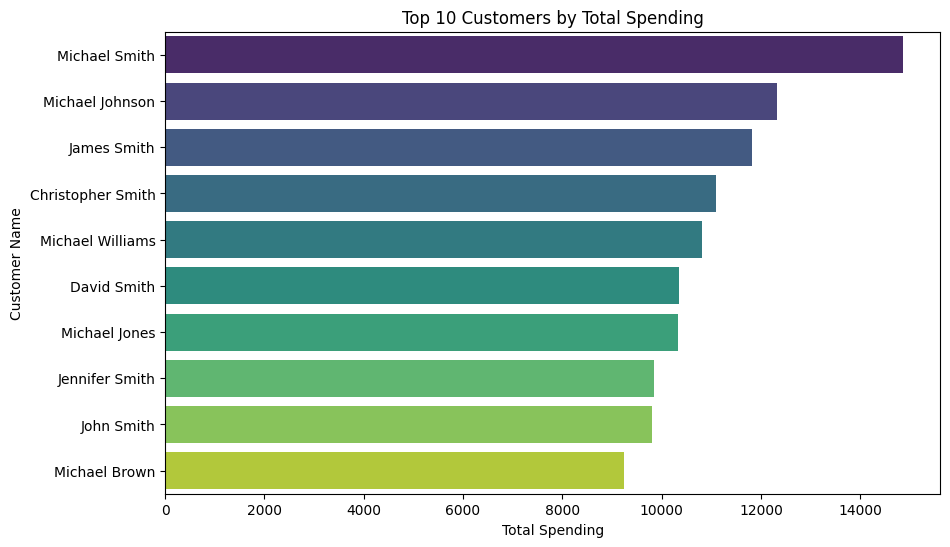

In [57]:
# Group by Customer_Name and calculate total spending
top_customers = df_cleaned.groupby('Customer_Name')['Total_Cost'].sum().reset_index()


top_customers = top_customers.sort_values(by='Total_Cost', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Cost', y='Customer_Name', data=top_customers, palette='viridis')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Customer Name')
plt.show()


Customer Segmentation

In [61]:

customer_segments = df_cleaned.groupby('Customer_Name').agg({
    'Total_Cost': 'sum',
    'Total_Items': 'sum',
    'Payment_Method': lambda x: x.mode()[0], 
}).reset_index()

# Display the segmented data
print(customer_segments.head())


   Customer_Name  Total_Cost  Total_Items  Payment_Method
0  Aaron Acevedo       89.80            3  Mobile Payment
1   Aaron Acosta      215.32           13            Cash
2    Aaron Adams      456.64           54            Cash
3   Aaron Adkins       30.30            2            Cash
4  Aaron Aguilar      116.03           24            Cash


promotion effectiveness

C:\Users\Hp-D\AppData\Local\Temp\ipykernel_155072\4260686007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promotion', y='Total_Cost', data=promotion_effect, palette='coolwarm')


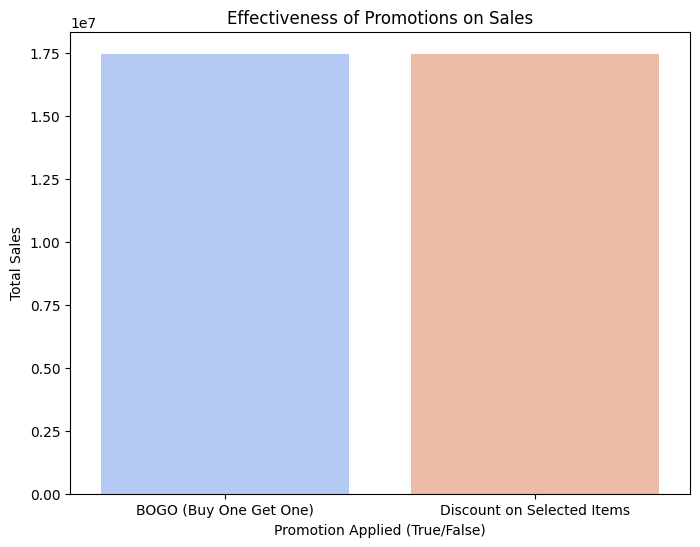

In [59]:
# Group by Promotion and calculate total sales
promotion_effect = df_cleaned.groupby('Promotion')['Total_Cost'].sum().reset_index()

# Plotting the effect of promotions on sales
plt.figure(figsize=(8, 6))
sns.barplot(x='Promotion', y='Total_Cost', data=promotion_effect, palette='coolwarm')
plt.title('Effectiveness of Promotions on Sales')
plt.xlabel('Promotion Applied (True/False)')
plt.ylabel('Total Sales')
plt.show()


Seasonality Analysis

C:\Users\Hp-D\AppData\Local\Temp\ipykernel_155072\3290744364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Total_Cost', data=seasonality, palette='Set2')


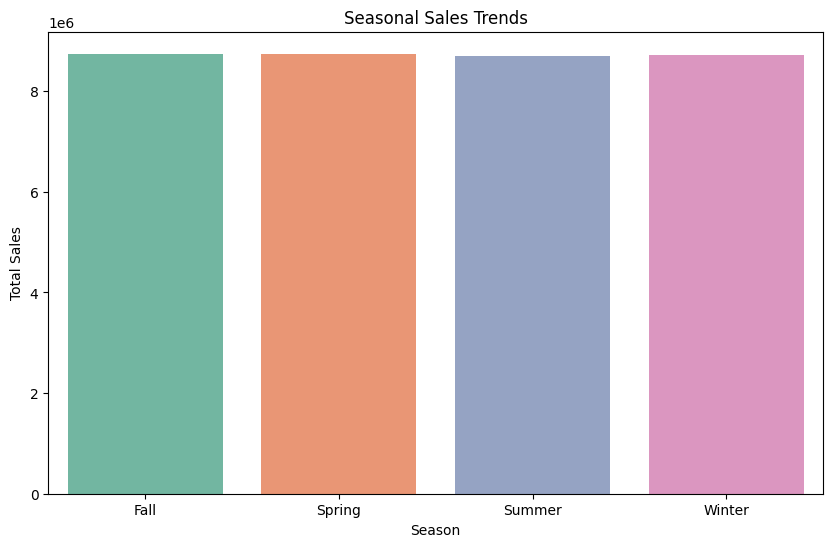

In [60]:
# Group by Season and calculate total sales
seasonality = df_cleaned.groupby('Season')['Total_Cost'].sum().reset_index()

# Plotting sales across seasons
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Total_Cost', data=seasonality, palette='Set2')
plt.title('Seasonal Sales Trends')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()


extracting month from date

In [33]:
df['Date'] = pd.to_datetime(df['Date'])  # Update 'Date' with the correct column name

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# View the DataFrame with the new Month column
print(df[['Date', 'Month']].head())

                 Date  Month
0 2022-01-21 06:27:29      1
1 2023-03-01 13:01:21      3
2 2024-03-21 15:37:04      3
3 2020-10-31 09:59:47     10
4 2020-12-10 00:59:59     12


Relation between month and total Cost

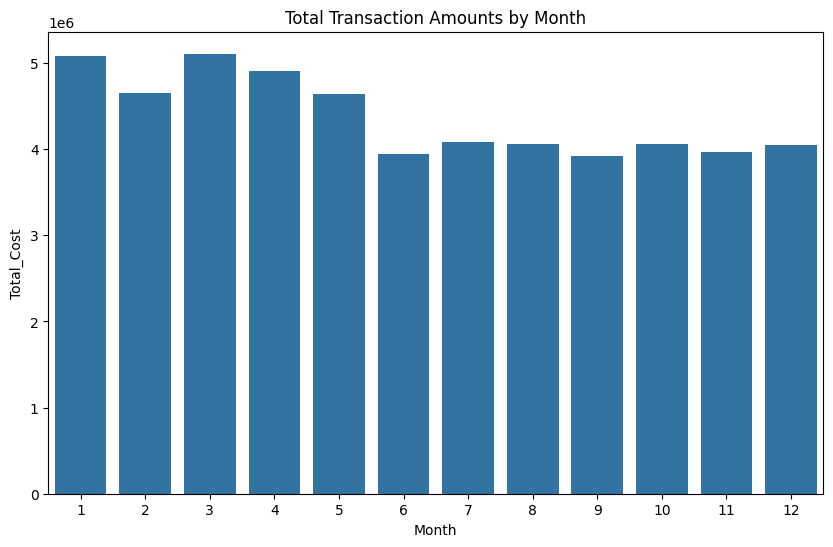

In [35]:
# Example: Group by Month and calculate the total transaction amount
monthly_data = df.groupby('Month')['Total_Cost'].sum().reset_index()  # Use the correct column for 'Total_Amount'


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total_Cost', data=monthly_data)
plt.title('Total Transaction Amounts by Month')
plt.xlabel('Month')
plt.ylabel('Total_Cost')
plt.show()


scatter plot

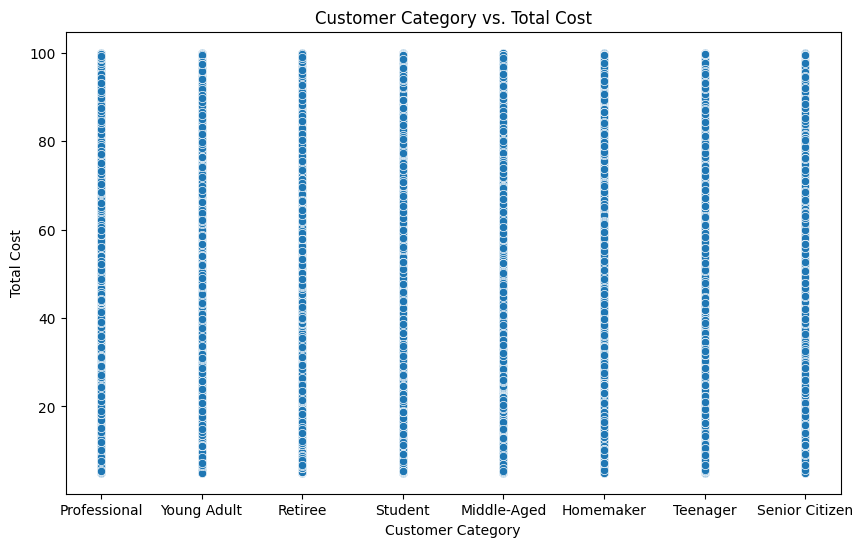

In [50]:
# Scatter plot to visualize total cost vs. customer category
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer_Category', y='Total_Cost', data=df_cleaned)
plt.title('Customer Category vs. Total Cost')
plt.xlabel('Customer Category')
plt.ylabel('Total Cost')
plt.show()


correlation heatmap


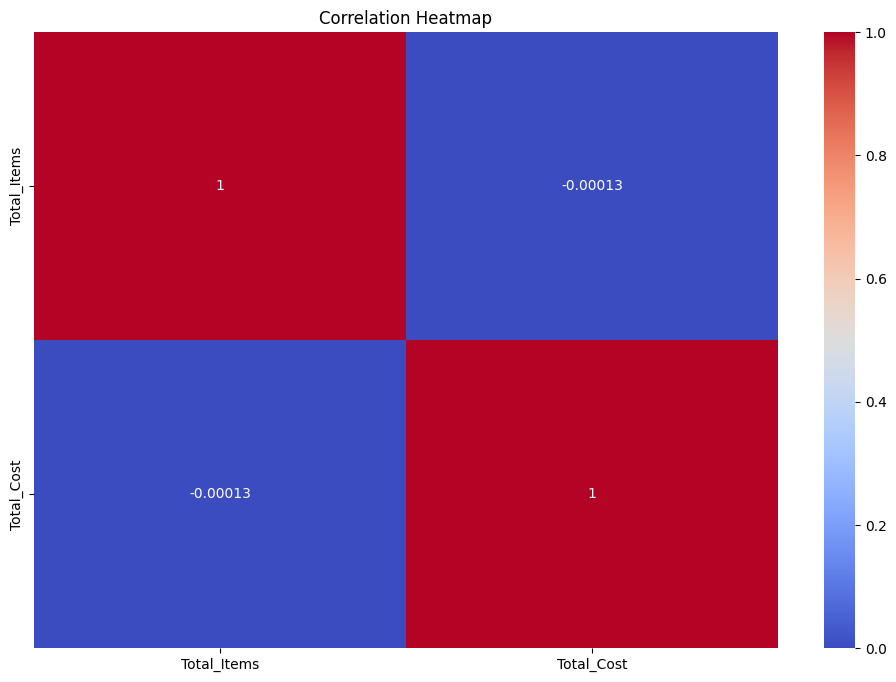

In [51]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned[['Total_Items', 'Total_Cost']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Sentiment analysis

In [53]:
! pip install TextBlob

Defaulting to user installation because normal site-packages is not writeable
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   -------------------------------------- 626.3/626.3 kB 569.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ -

In [55]:
from textblob import TextBlob
import pandas as pd

# Simulating a DataFrame with the same number of rows as the reviews
df = pd.DataFrame({
    'Transaction_ID': [1, 2, 3, 4, 5],
    'Customer_Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva']
})


df['Product_Review'] = ["Great product!", "Not satisfied", "Good quality", "Poor service", "Highly recommend"]


df['Sentiment'] = df['Product_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)


df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


print(df[['Product_Review', 'Sentiment_Label']])


     Product_Review Sentiment_Label
0    Great product!        Positive
1     Not satisfied        Negative
2      Good quality        Positive
3      Poor service        Negative
4  Highly recommend        Positive


In [56]:
from textblob import TextBlob
import pandas as pd


df_subset = df_cleaned.head(5).copy()  


df_subset['Product_Review'] = ["Great product!", "Not satisfied", "Good quality", "Poor service", "Highly recommend"]


df_subset['Sentiment'] = df_subset['Product_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)


df_subset['Sentiment_Label'] = df_subset['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


print(df_subset[['Product_Review', 'Sentiment_Label']])


     Product_Review Sentiment_Label
1    Great product!        Positive
4     Not satisfied        Negative
5      Good quality        Positive
6      Poor service        Negative
7  Highly recommend        Positive


Real Time Analysis

C:\Users\Hp-D\AppData\Local\Temp\ipykernel_155072\3423051464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
C:\Users\Hp-D\AppData\Local\Temp\ipykernel_155072\3423051464.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Day'] = df_cleaned['Date'].dt.day
C:\Users\Hp-D\AppData\Local\Temp\ipykernel_155072\3423051464.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

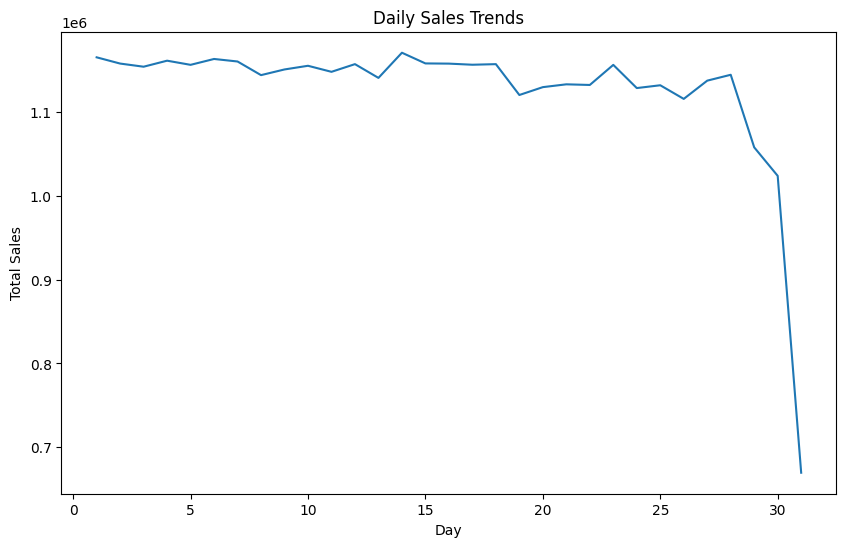

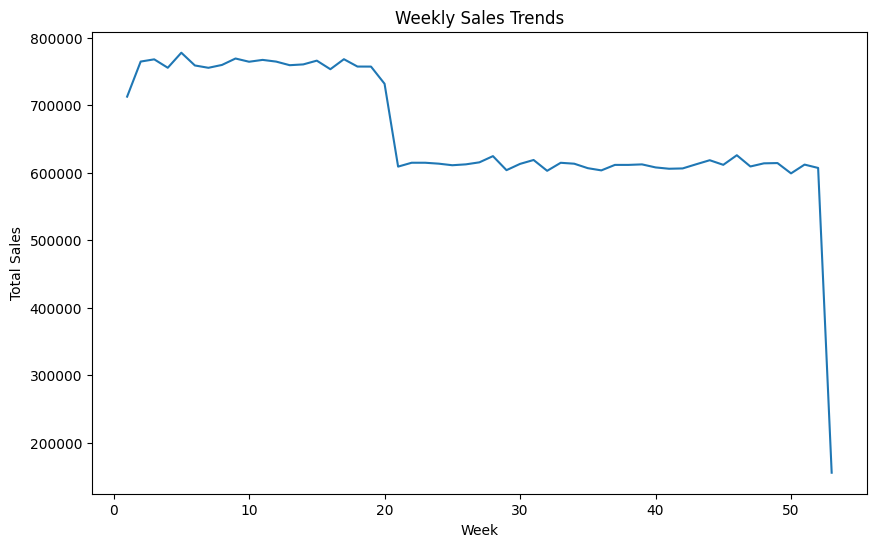

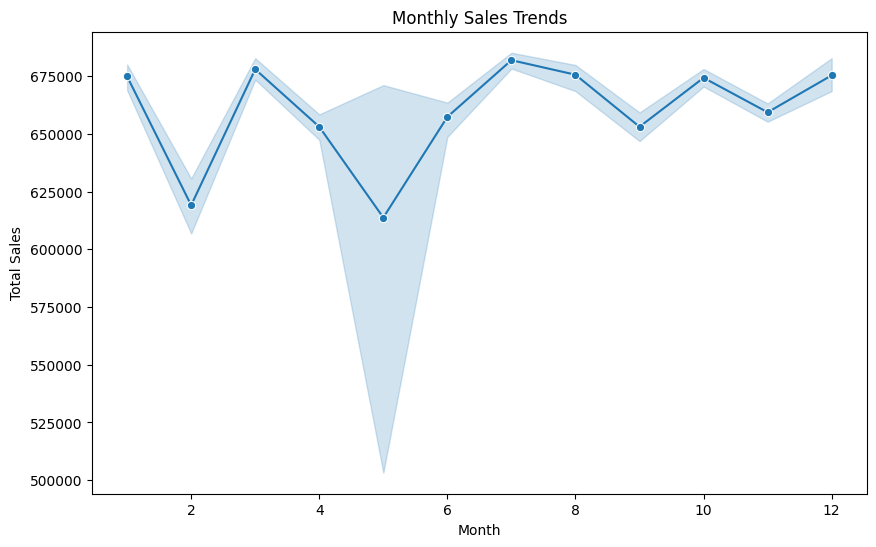

In [63]:

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

df_cleaned['Day'] = df_cleaned['Date'].dt.day
df_cleaned['Week'] = df_cleaned['Date'].dt.isocalendar().week
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Year'] = df_cleaned['Date'].dt.year

daily_trends = df_cleaned.groupby('Day')['Total_Cost'].sum().reset_index()
weekly_trends = df_cleaned.groupby('Week')['Total_Cost'].sum().reset_index()
monthly_trends = df_cleaned.groupby(['Year', 'Month'])['Total_Cost'].sum().reset_index()

# Plotting Daily Sales Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='Total_Cost', data=daily_trends)
plt.title('Daily Sales Trends')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.show()

# Plotting Weekly Sales Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Week', y='Total_Cost', data=weekly_trends)
plt.title('Weekly Sales Trends')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.show()

# Plotting Monthly Sales Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total_Cost', data=monthly_trends, marker="o")
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


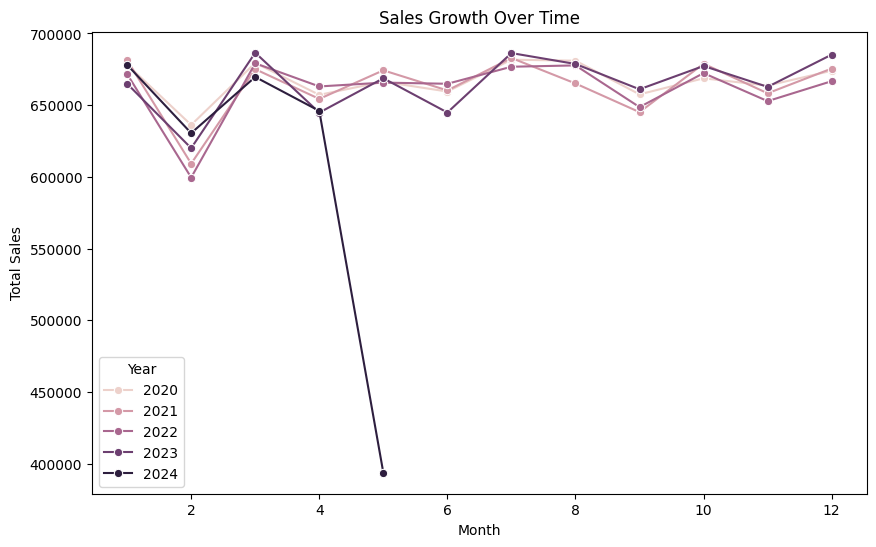

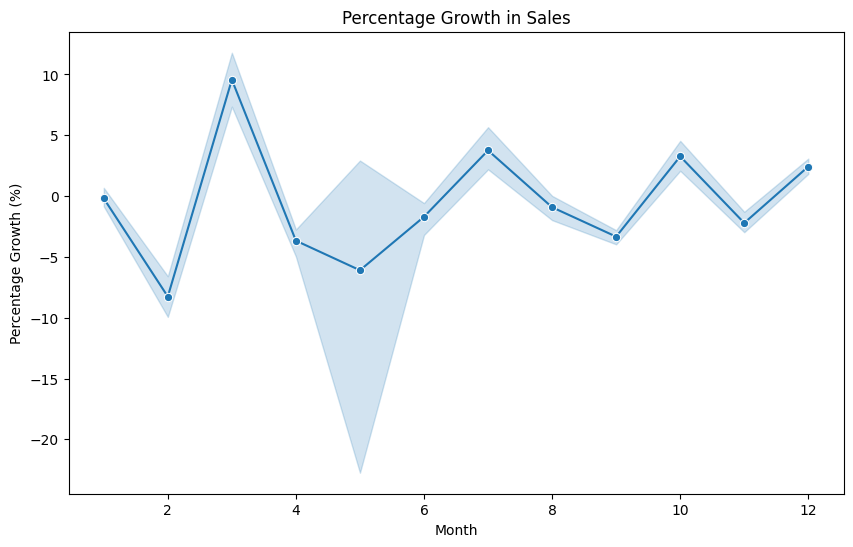

In [64]:

sales_growth = df_cleaned.groupby(['Year', 'Month'])['Total_Cost'].sum().reset_index()

sales_growth['Percentage_Growth'] = sales_growth['Total_Cost'].pct_change() * 100

# Plotting Sales Growth Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total_Cost', hue='Year', data=sales_growth, marker="o")
plt.title('Sales Growth Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Plotting Percentage Growth
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Percentage_Growth', data=sales_growth, marker="o")
plt.title('Percentage Growth in Sales')
plt.xlabel('Month')
plt.ylabel('Percentage Growth (%)')
plt.show()


Geographical analysis

C:\Users\Hp-D\AppData\Local\Temp\ipykernel_155072\426056291.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Cost', y='City', data=sales_by_city, palette='magma')


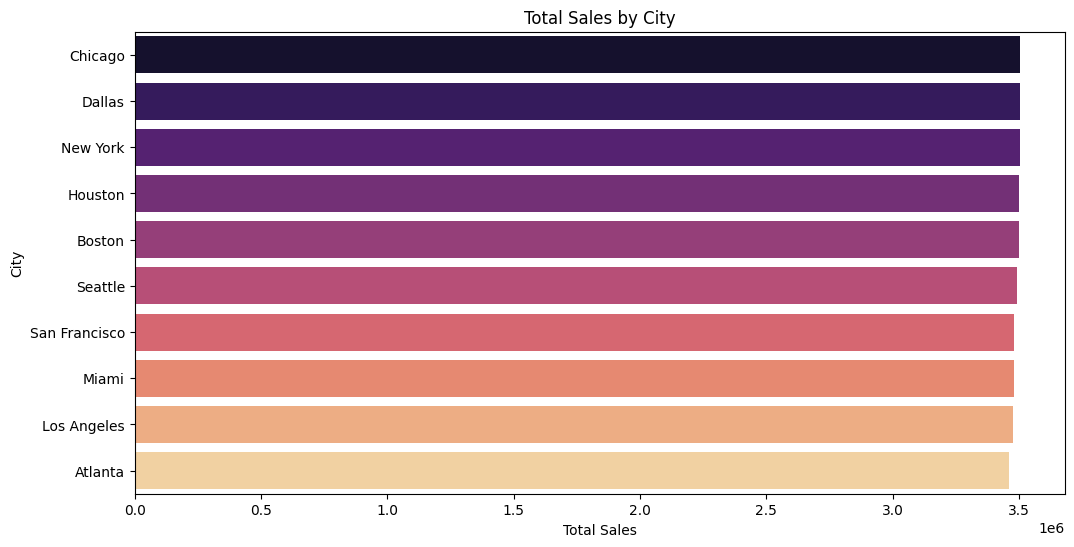

In [65]:

sales_by_city = df_cleaned.groupby('City')['Total_Cost'].sum().reset_index()

sales_by_city = sales_by_city.sort_values(by='Total_Cost', ascending=False)

# Plotting Sales by City
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Cost', y='City', data=sales_by_city, palette='magma')
plt.title('Total Sales by City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()


Churn Analysis

In [4]:
import pandas as pd

print(df.columns)


Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')


In [5]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(df.head())


   Transaction_ID                Date      Customer_Name  \
0      1000000000 2022-01-21 06:27:29       Stacey Price   
1      1000000001 2023-03-01 13:01:21   Michelle Carlson   
2      1000000002 2024-03-21 15:37:04        Lisa Graves   
3      1000000003 2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004 2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   Payment_Method           City        Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles    Warehouse Club              True   
1       

Defining and reviewing churn and giving a value

In [6]:

last_date = df['Date'].max()

churn_threshold = pd.DateOffset(months=6)
churn_date = last_date - churn_threshold

customer_last_purchase = df.groupby('Customer_Name')['Date'].max().reset_index()

customer_last_purchase['Churn'] = customer_last_purchase['Date'] < churn_date


print(customer_last_purchase.head())


   Customer_Name                Date  Churn
0  Aaron Acevedo 2023-09-12 09:27:04   True
1   Aaron Acosta 2022-02-02 03:23:02   True
2    Aaron Adams 2024-04-15 10:07:18  False
3   Aaron Adkins 2023-04-21 02:54:58   True
4  Aaron Aguilar 2024-03-23 10:05:44  False


Calculating churn rate

In [7]:

total_customers = len(customer_last_purchase)

churned_customers = customer_last_purchase[customer_last_purchase['Churn'] == True]

# Calculate churn rate
churn_rate = len(churned_customers) / total_customers * 100


print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 76.04%


Customer churn distribution

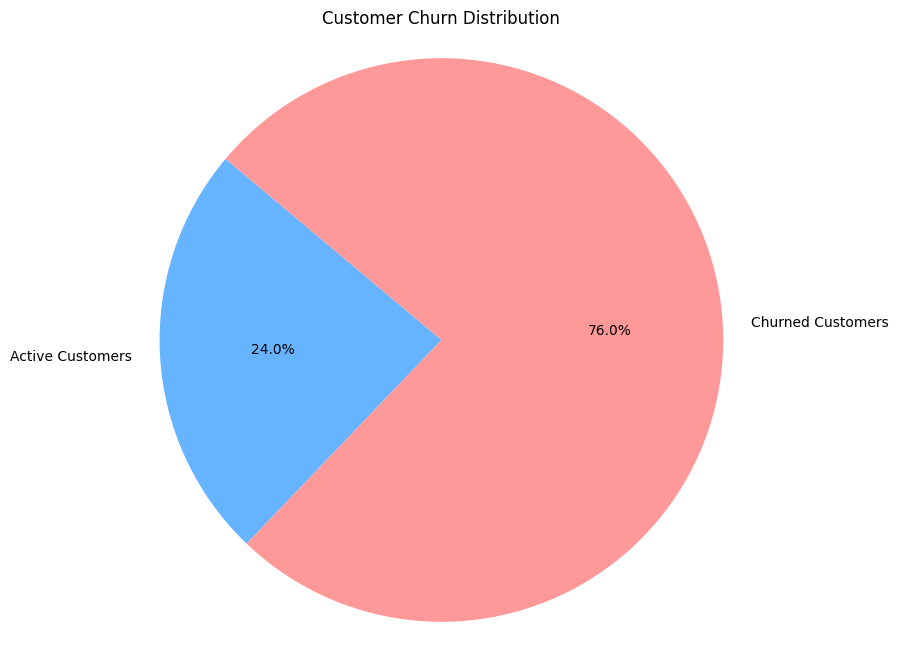

In [8]:
import matplotlib.pyplot as plt


active_customers = customer_last_purchase[customer_last_purchase['Churn'] == False]

labels = ['Active Customers', 'Churned Customers']
sizes = [len(active_customers), len(churned_customers)]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.axis('equal')
plt.title('Customer Churn Distribution')
plt.show()


Revenue distribution by churn (active and churned)

C:\Users\Hp-D\AppData\Local\Temp\ipykernel_45400\3687745528.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn', y='Total_Cost', data=revenue_by_churn_status, palette='Set2')


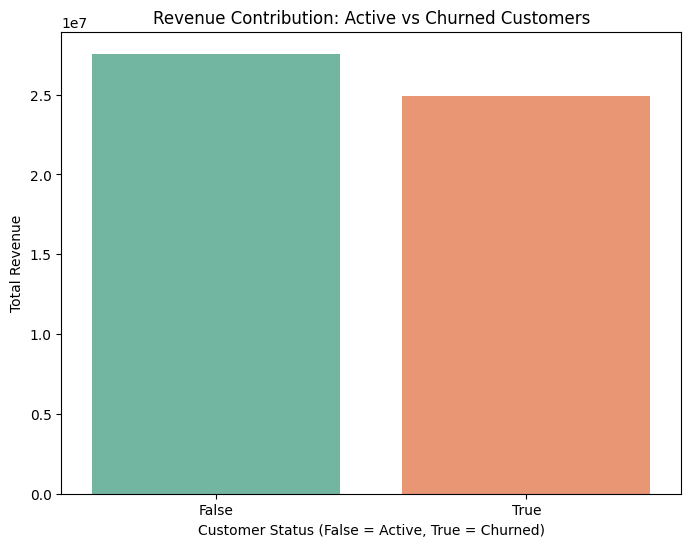

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = df.merge(customer_last_purchase[['Customer_Name', 'Churn']], on='Customer_Name', how='left')


revenue_by_churn_status = df.groupby('Churn')['Total_Cost'].sum().reset_index()

# Visualize revenue contribution by active vs churned customers
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='Total_Cost', data=revenue_by_churn_status, palette='Set2')
plt.title('Revenue Contribution: Active vs Churned Customers')
plt.xlabel('Customer Status (False = Active, True = Churned)')
plt.ylabel('Total Revenue')
plt.show()


In [14]:
! pip install mysql-connector-python


Defaulting to user installation because normal site-packages is not writeable


Conclusions and Insights:

Monthly Spending Patterns:
1.Clear variations in customer spending patterns were observed across different months and seasons.
2.Seasonal spikes in sales, with peak activity in festive seasons or during promotional periods.

Top Customers by Total Cost:
1.Identified top customers contributing the most revenue.
2.High spenders are repeat customers, often availing promotions.

Sales by Product:
1.Certain products (especially essentials) perform consistently well, while others see higher sales in specific seasons.

Promotion Effectiveness:
1.Promotions led to significant increases in sales, especially when targeting high-value customers.
2.Sales spiked during the promotional period, particularly for discounted products.

Sales by City:
1.Cities with higher population density and affluent areas generated the most revenue.
2.Different store types performed better in specific cities, highlighting regional preferences.

Store Type Preferences:
1.Larger store formats saw more sales for high-cost items, while smaller stores performed better in dense urban locations.

Churn Analysis:
1.Customers with decreasing transaction frequency and lower spending amounts were identified as likely to churn.
2.Churn rate analysis highlighted the need for better customer engagement strategies.

Geographical Insights:
1.Specific regions showed higher affinity for luxury products, while others leaned towards more cost-effective items.

Sales Growth Over Time:
1.Positive sales growth was observed in certain months, with a steady increase in overall sales year-on-year.
2.Daily/weekly sales trends revealed peak shopping days, especially during weekends.